In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [92]:
df = pd.read_csv('../datasets/graduate-admissions/Admission_Predict.csv')

In [93]:
print(len(df))
for x in df.columns:
    print(x)

400
Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [96]:
df = df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [60]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


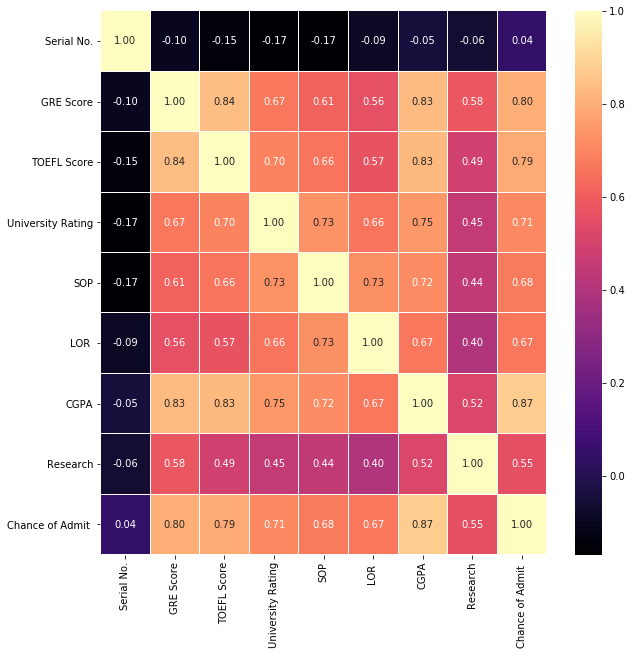

In [12]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [13]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


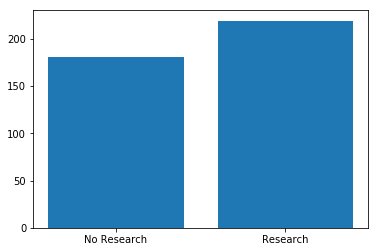

In [26]:
y=np.array([len(df[df.Research==0]), len(df[df.Research==1])])
x=['No Research', 'Research']

plt.bar(x,y)
plt.show()

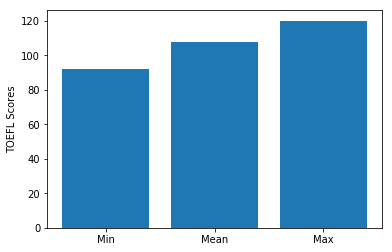

In [37]:
#y = np.array([df['TOEFL Score'].min(), df['TOEFL Score'].mean(), df['TOEFL Score'].max()])
x=['Min', 'Mean', 'Max']
plt.ylabel('TOEFL Scores')
plt.bar(x,y)
plt.show()

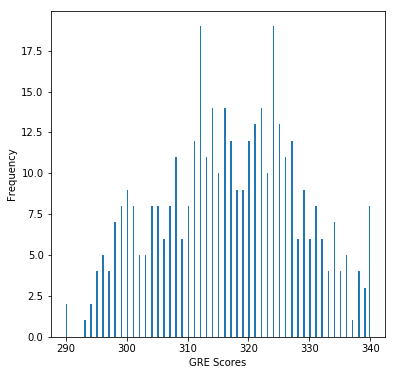

In [30]:
x=df['GRE Score'].plot(kind='hist', bins=200, figsize=(6,6))
plt.xlabel('GRE Scores')
plt.ylabel('Frequency')
plt.show()

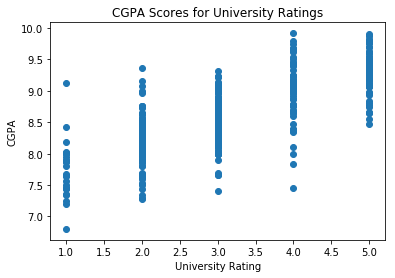

In [32]:
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

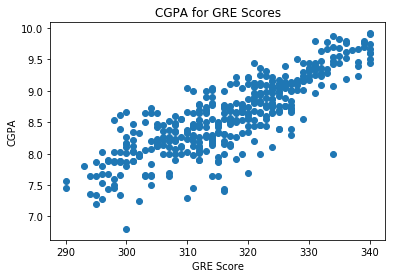

In [33]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

Text(0.5, 1.0, 'Score')

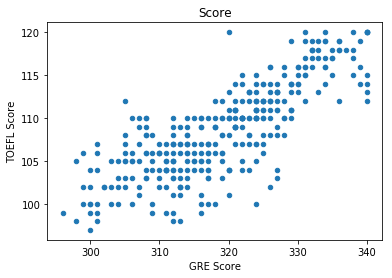

In [47]:
df[df.CGPA>=8].plot(x='GRE Score', y='TOEFL Score', kind='scatter')
plt.title('Score')

In [101]:
np.max(x_data)

Serial No.           400.00
GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.92
Research               1.00
dtype: float64

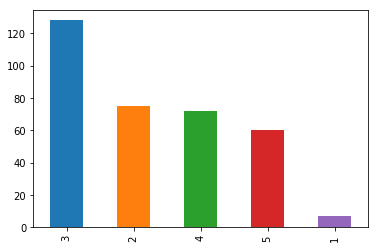

In [78]:
df[df.CGPA >= 8]['University Rating'].value_counts().head(5).plot(kind='bar')

In [89]:
serialNos = df['Serial No.'].values
df.drop(['Serial No.'], axis=1, inplace = True)

In [98]:
y=df['Chance of Admit'].values
x_data=df.drop(['Chance of Admit'], axis=1)

In [160]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [165]:
print('Linear Regression')

Linear Regression


In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_head_lr = lr.predict(x_test)

In [112]:
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

real value of y_test[1]: 0.68 -> the predict: [0.73430228]
real value of y_test[2]: 0.9 -> the predict: [0.90436809]


In [113]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

r_square score:  0.8212241793299224
r_square score (train dataset):  0.8157123222604523


In [152]:
y_head_lr = lr.predict(x_test2)
plt.scatter(x_test2['GRE Score', y_head_lr)

In [148]:
x_test2=x_test[x_test['GRE Score']>=0.7]

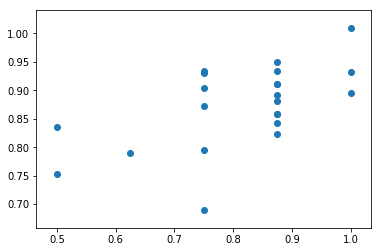

In [157]:
plt.scatter(x_test2['SOP'], y_head_lr)

In [166]:
print('Random Forest Regression')

Random Forest Regression


In [168]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [169]:
y_head_rfr = rfr.predict(x_test)

In [170]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

r_square score:  0.8534752219859076
real value of y_test[1]: 0.68 -> the predict: [0.7449]
real value of y_test[2]: 0.9 -> the predict: [0.9379]
r_square score (train dataset):  0.9733394988186763
